## Knee Cartilage Segmentation using Classic Machine Models 

In [1]:
#Import the required packages
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import imageio

In [17]:
#Extract the patches of spricified shape and stride and return one dimensional array

def extract_patches(arr,arr_target,patch_shape,stride,num):
    new_shape=((arr.shape[0]-patch_shape)//stride)+1
    #print("input shape",arr.shape)
    #print("new shape",new_shape)
    arr_out=np.zeros((new_shape,new_shape,patch_shape,patch_shape))
    target_out=np.zeros((new_shape,new_shape,patch_shape,patch_shape))
    #print("output shape",arr_out.shape)
    for j in range(arr_out.shape[0]):
        for k in range(arr_out.shape[1]):
            arr_out[j,k] = arr[stride*j:stride*j+patch_shape,stride*k:stride*k+patch_shape]
            target_out[j,k] = arr_target[stride*j:stride*j+patch_shape,stride*k:stride*k+patch_shape]
    print("output shape",target_out.shape)
    output_reshaped=arr_out.reshape(arr_out.shape[0],arr_out.shape[1],-1)
    output_reshaped=output_reshaped.reshape(-1,output_reshaped.shape[2])
    
    target_reshaped=target_out.reshape(target_out.shape[0],target_out.shape[1],-1)
    target_label=target_reshaped[:,:,112]
    target_label=target_label.reshape(-1)
    pos=np.arange(target_label.shape[0])
    pos1=pos//new_shape
    pos2=pos%new_shape
    l=target_label.shape[0]
    nslice=np.array([num]*l)


    return output_reshaped,(target_label>0).astype('int'),pos1,pos2,nslice

In [3]:
#Function take list of file names and return corresponding one dimensional vector for each image
def return_dataset(listlabels,dset):
    feature_list=[]
    target_list=[]
    for i in listlabels:
        if dset==0:
            image=loadmat('/beegfs/ark576/Knee Cartilage Data/Train Data/{}'.format(i))
        elif dset==1:
            image=loadmat('/beegfs/ark576/Knee Cartilage Data/Validation Data/{}'.format(i))
        else:
            image=loadmat('/beegfs/ark576/Knee Cartilage Data/Test Data/{}'.format(i))
            
        targets_all=image['SegmentationF']+image['SegmentationT']+image['SegmentationP']
        
        #handle 15 slices which you are not yet doing 
        for k in range(15):
            im=image['MDnr'][:,:,k]
            #print(targets_all[:,:,i].shape)
            features,target,pos1,pos2,ls=extract_patches(im,targets_all[:,:,k],15,1,k)
            feature_full=features
            #feature_full=np.insert(features,0,pos1,axis=1)
            #feature_full=np.insert(feature_full,0,pos2,axis=1)
            #feature_full=np.insert(feature_full,0,ls,axis=1)
            feature_list.append(feature_full)
            target_list.append(target)
    final_feature=np.vstack(feature_list)
    final_target=np.concatenate(np.vstack(target_list),axis=0)
    return final_feature,final_target


In [4]:
import pickle
with open("/beegfs/ark576/Knee Cartilage Data/Train Data/train_file_names",'rb') as f:
    train_list=pickle.load(f)

In [5]:
#train set
train_x,train_y=return_dataset(train_list,0)

In [6]:
# Under Sampling
list_train_x=[]
list_train_y=[]
import random
zero_index=np.where(train_y==0)[0]
non_zero_index=np.where(train_y!=0)[0]
sampled_idx=random.sample(list(zero_index),len(zero_index)//10)
sampled_train_x_zero=train_x[sampled_idx]
sampled_train_y_zero=train_y[sampled_idx]
sampled_train_x_non_z=train_x[non_zero_index]
sampled_train_y_non_z=train_y[non_zero_index]
list_train_x.append(sampled_train_x_zero)
list_train_x.append(sampled_train_x_non_z)
list_train_y.append(sampled_train_y_zero)
list_train_y.append(sampled_train_y_non_z)
final_train_x=np.vstack(list_train_x)
final_train_y=np.concatenate(list_train_y,axis=0)

In [7]:
#Normalizing
train_min=np.min(final_train_x)
train_max=np.max(final_train_x)
train_norm_x=(final_train_x-train_min)/train_max

In [18]:
#Validation set
import pickle
with open("/beegfs/ark576/Knee Cartilage Data/Validation Data/val_file_names",'rb') as f:
    val_list=pickle.load(f)
val_x,val_y=return_dataset(val_list,1)
val_norm_x=(val_x-train_min)/train_max

output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output shape (242, 242, 15, 15)
output s

In [10]:
with open("train_x",'wb') as f:
    pickle.dump("train_x",f)
with open("train_y",'wb') as f:
    pickle.dump("train_y",f)

In [17]:
train_x.shape

(30746100, 228)

In [11]:
#Train a random forest classifier on trainset
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=128,class_weight='balanced',min_samples_split=10,min_samples_leaf=5)
random_forest.fit(train_norm_x,final_train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [80]:
#Run the model for validation set
from sklearn import metrics
proba_val=random_forest.predict_proba(val_norm_x)[:,1]
score=metrics.roc_auc_score(val_y,proba_val)
score

0.98839120559447347

In [48]:
fpr_val, tpr_val, thresholds_val=metrics.roc_curve(val_y,proba_val)

### AUC ROC Curve for validation dataset

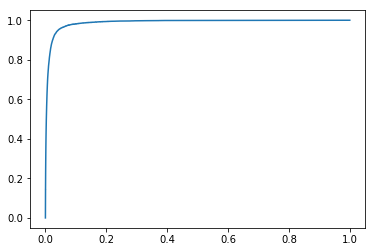

In [49]:
plt.plot(fpr_val,tpr_val)
plt.show()

## Visualizing the prediction

In [55]:
#For one image, some statistics
print("ratio of number of predicted 1/ true 1 = ",sum(pp)/sum(val_y))
print("ration of number of predicted 0/ true 0 = ",sum(pp==0)/sum(val_y==0))

ratio of number of predicted 1/ true 1 =  2.45799553519
ration of number of predicted 0/ true 0 =  0.991883144492


In [24]:
reshaped_pp=pp.reshape(7,15,121,121)
reshaped_val_y=val_y.reshape(7,15,121,121)

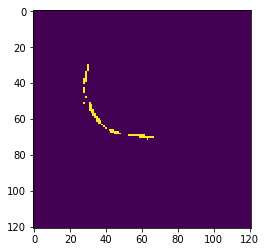

In [25]:
plt.imshow(reshaped_val_y[3,8,:,:])

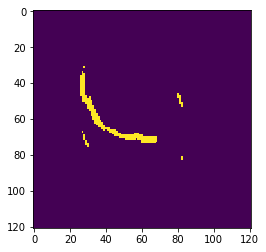

In [26]:
plt.imshow(reshaped_pp[3,8,:,:])

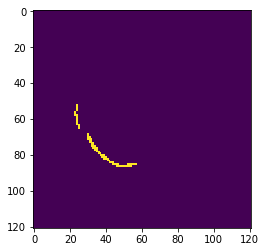

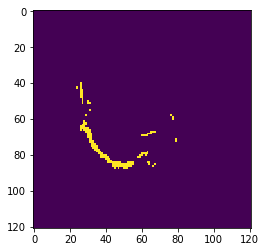

-----------------------------


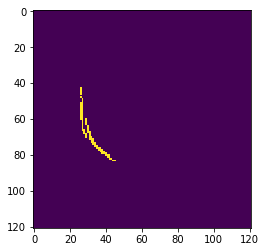

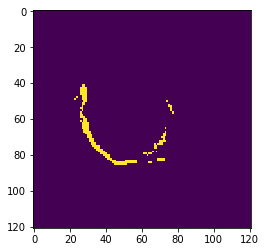

-----------------------------


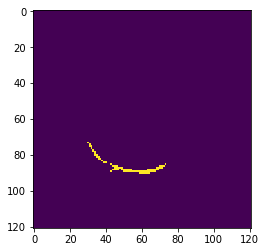

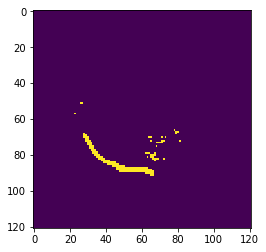

-----------------------------


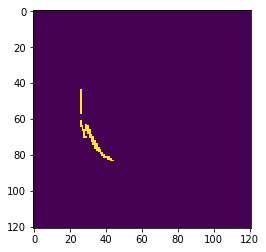

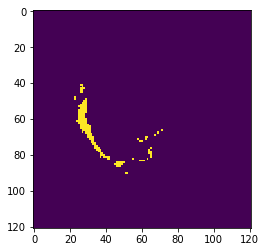

-----------------------------


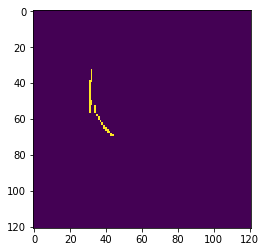

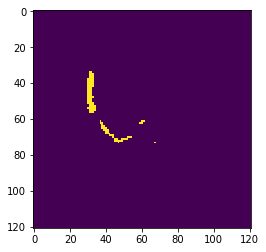

-----------------------------


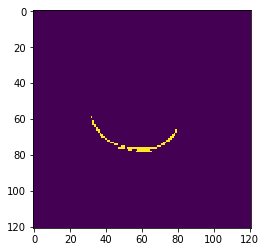

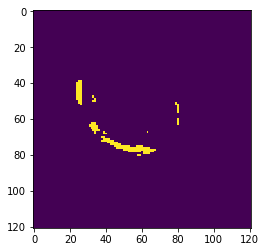

-----------------------------


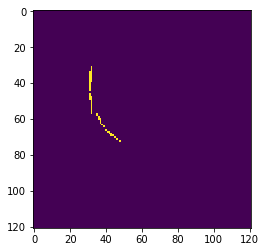

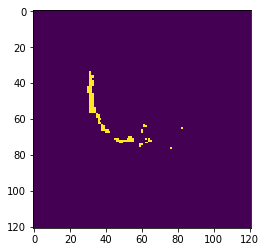

-----------------------------


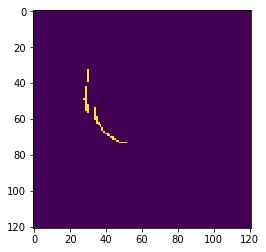

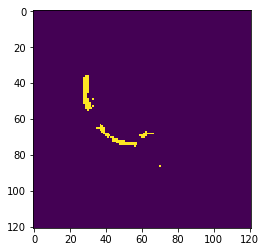

-----------------------------


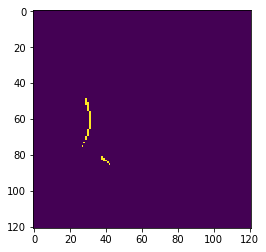

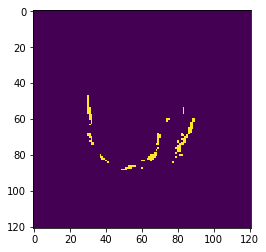

-----------------------------


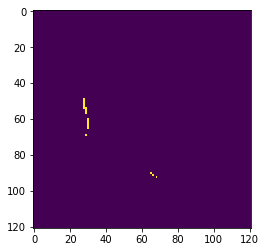

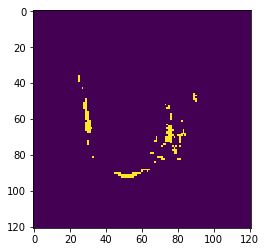

-----------------------------


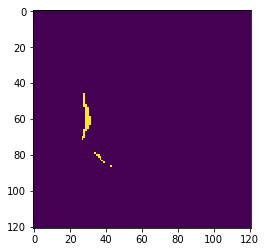

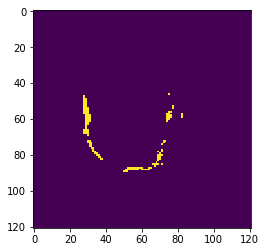

-----------------------------


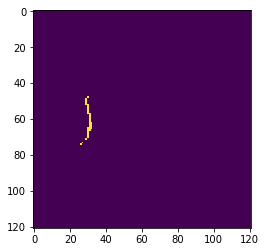

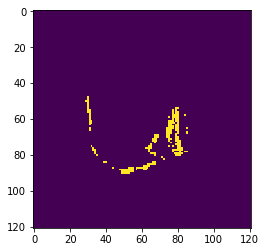

-----------------------------


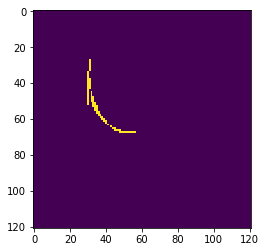

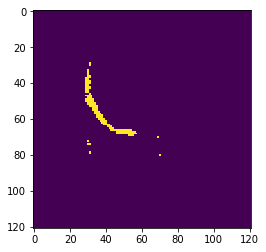

-----------------------------


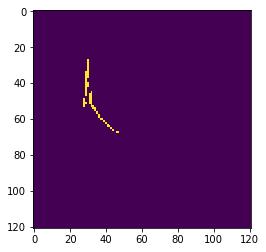

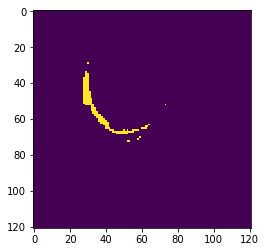

-----------------------------


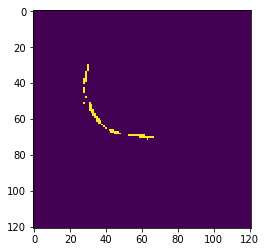

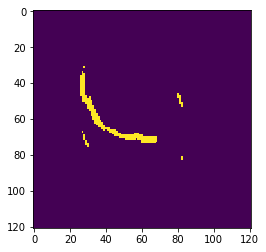

-----------------------------


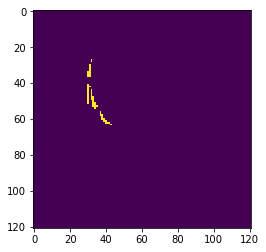

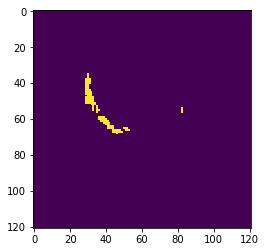

-----------------------------


In [35]:
i=[4,6,5,3]
j=[7,5,8,6]
for a in i:
    for b in j:
        plt.imshow(reshaped_val_y[a,b,:,:])
        plt.show()
        plt.imshow(reshaped_pp[a,b,:,:])
        plt.show()
        print("-----------------------------")

## Testing Trained Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
trn_x_mean=np.mean(train_x)
trn_x_std=np.std(train_x)
train_norm_x=(train_x-trn_x_mean)/trn_x_std
random_forest2 = RandomForestClassifier(n_estimators=128,class_weight='balanced',min_samples_split=20,min_samples_leaf=10)
random_forest2.fit(train_norm_x,train_y)

In [9]:
import pickle
random_stride1=pickle.load(open("/home/cvh255/Cartilage/jobsubmission/random_stride1",'rb'))

In [14]:
val_trained=random_stride1.predict(val_norm_x)

In [ ]:
train_trained=random_stride1.predict(train_norm_x)

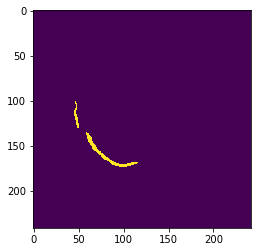

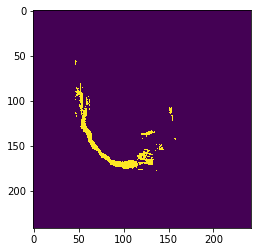

-----------------------------


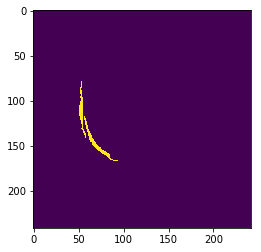

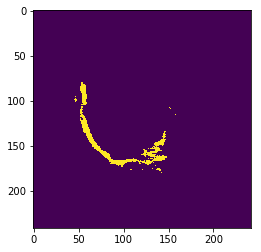

-----------------------------


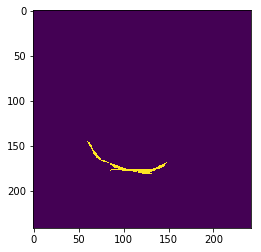

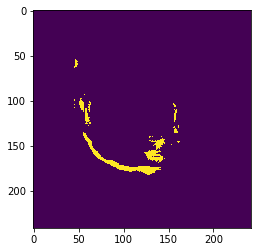

-----------------------------


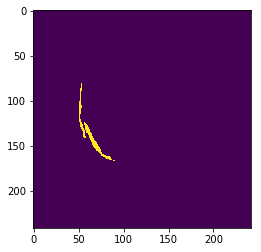

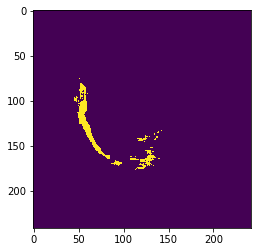

-----------------------------


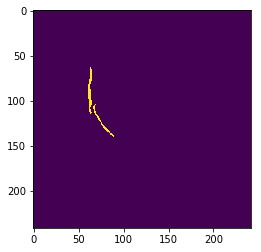

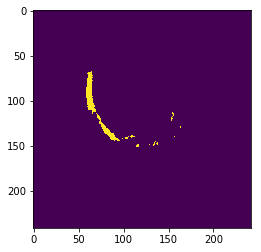

-----------------------------


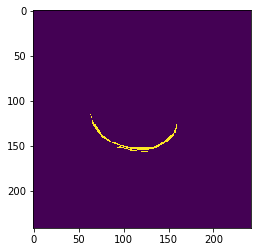

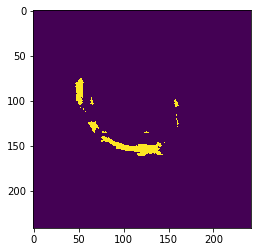

-----------------------------


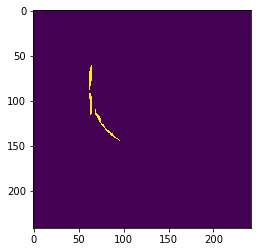

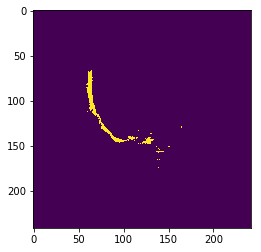

-----------------------------


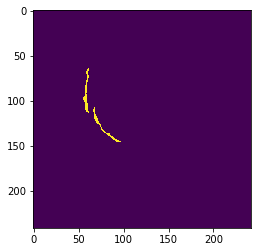

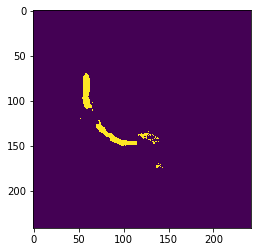

-----------------------------


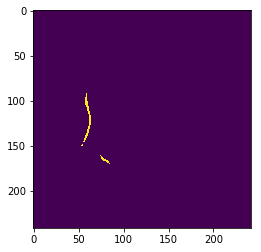

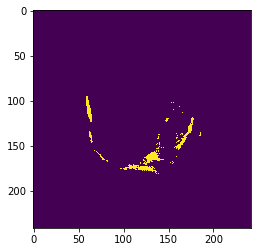

-----------------------------


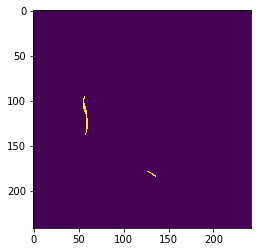

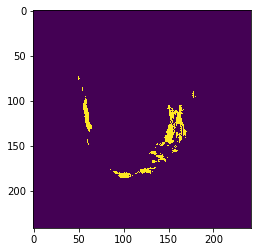

-----------------------------


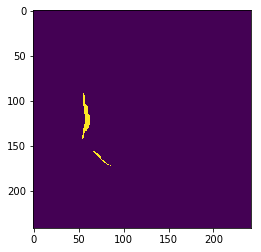

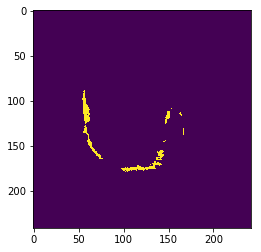

-----------------------------


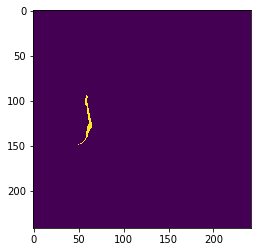

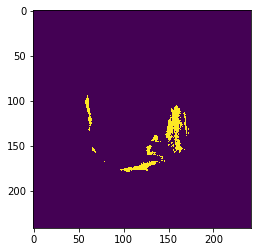

-----------------------------


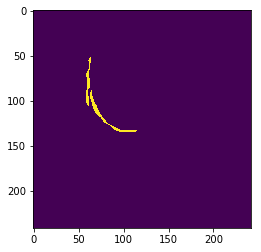

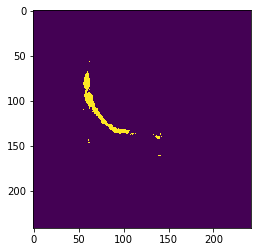

-----------------------------


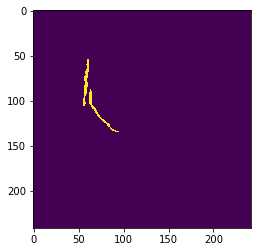

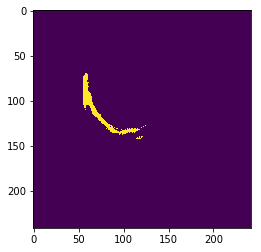

-----------------------------


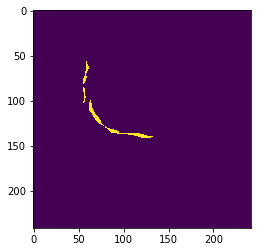

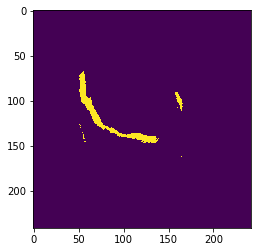

-----------------------------


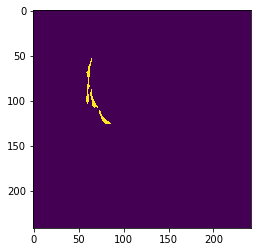

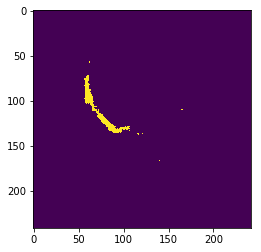

-----------------------------


In [15]:
import matplotlib.pyplot as plt
reshaped_pp=val_trained.reshape(7,15,242,242)
reshaped_val_y=val_y.reshape(7,15,242,242)

i=[4,6,5,3]
j=[7,5,8,6]
for a in i:
    for b in j:
        plt.imshow(reshaped_val_y[a,b,:,:])
        plt.show()
        plt.imshow(reshaped_pp[a,b,:,:])
        plt.show()
        print("-----------------------------")

In [36]:
import scipy
print(scipy.spatial.distance.dice(val_y,val_trained))
print(scipy.spatial.distance.dice(train_y,train_trained))

0.5984333262319529
0.0837794854263589


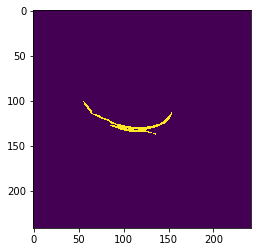

In [30]:
import matplotlib.pyplot as plt
reshaped_train=train_trained.reshape(7,15,242,242)
reshaped_train_y=train_y.reshape(7,15,242,242)

i=[4,6,5,3]
j=[7,5,8,6]
for a in i:
    for b in j:
        plt.imshow(reshaped_train_y[a,b,:,:])
        plt.show()
        plt.imshow(reshaped_train[a,b,:,:])
        plt.show()
        print("-----------------------------")

## RF with min_split_value = 400

In [9]:
random_knees400=pickle.load(open("/home/cvh255/Cartilage/jobsubmission/random_split400",'rb'))

In [10]:
val_trained=random_knees400.predict(val_norm_x)

In [12]:
import scipy
print(scipy.spatial.distance.dice(val_y,val_trained))

0.9798873054132515


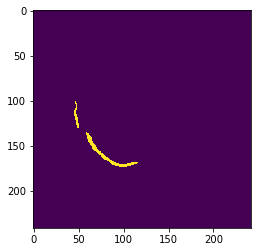

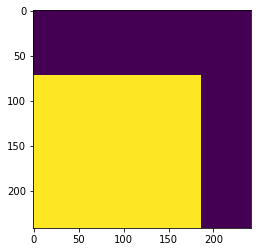

-----------------------------


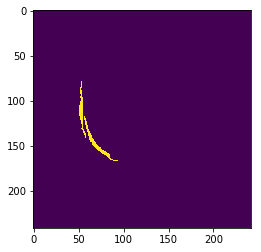

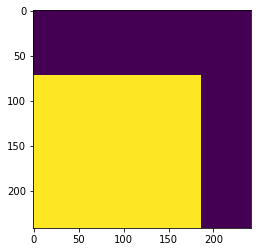

-----------------------------


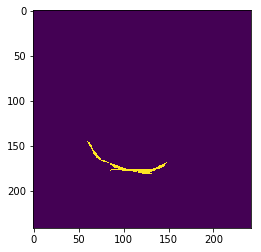

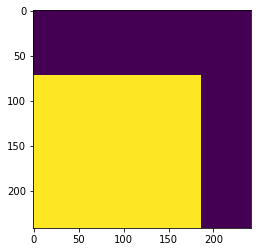

-----------------------------


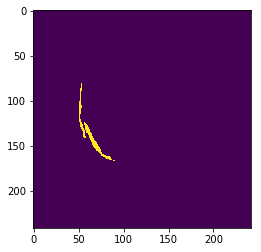

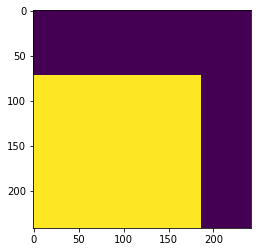

-----------------------------


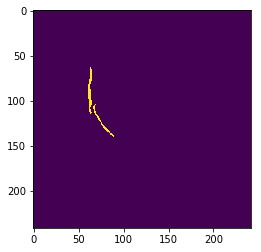

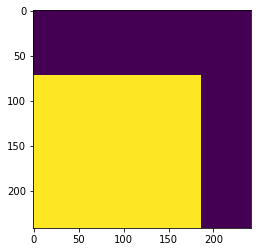

-----------------------------


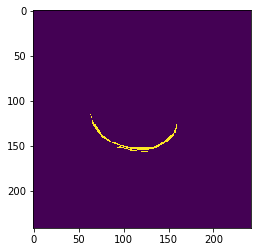

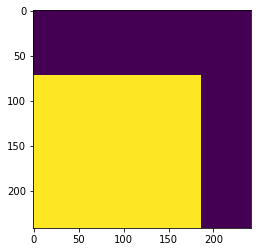

-----------------------------


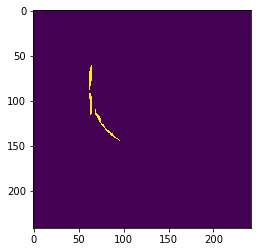

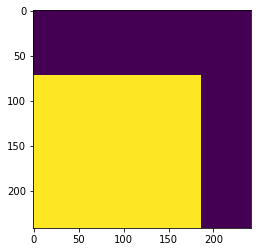

-----------------------------


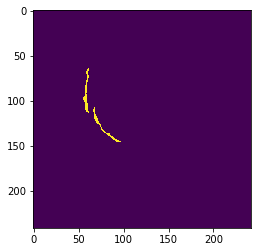

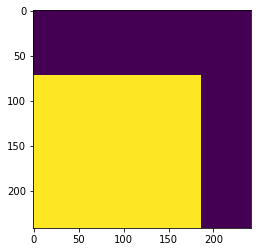

-----------------------------


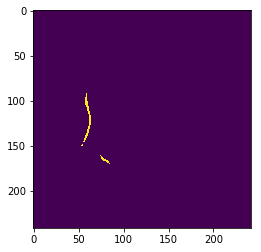

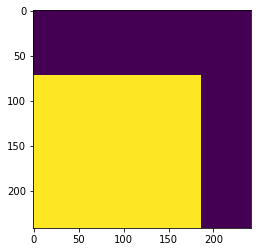

-----------------------------


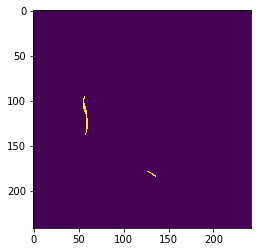

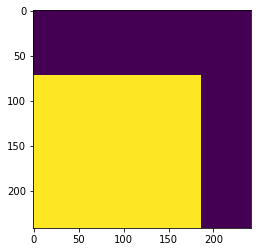

-----------------------------


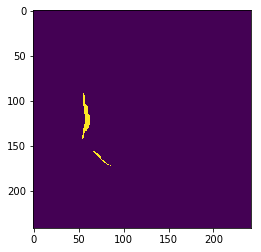

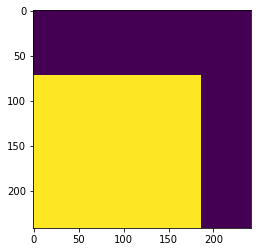

-----------------------------


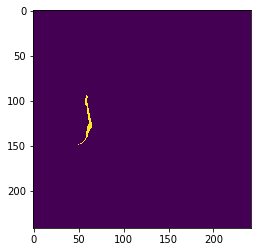

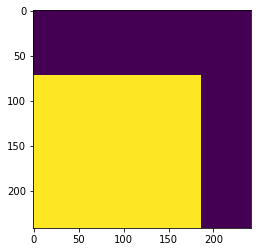

-----------------------------


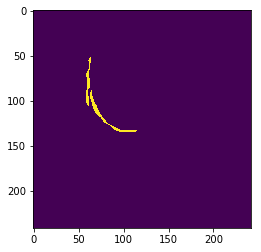

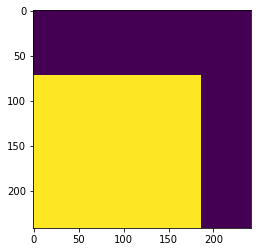

-----------------------------


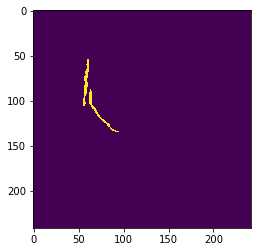

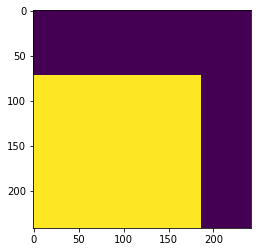

-----------------------------


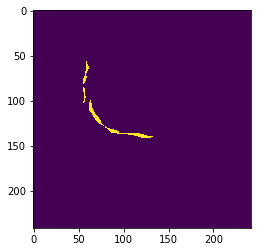

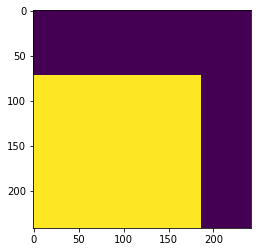

-----------------------------


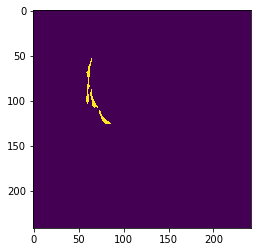

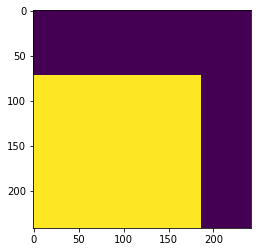

-----------------------------


In [13]:
import matplotlib.pyplot as plt
reshaped_train=val_trained.reshape(7,15,242,242)
reshaped_train_y=val_y.reshape(7,15,242,242)

i=[4,6,5,3]
j=[7,5,8,6]
for a in i:
    for b in j:
        img =Image.fromarray(reshaped_train_y[a,b,:,:])
        plt.imshow(reshaped_train_y[a,b,:,:])
        plt.show()
        plt.imshow(reshaped_train[a,b,:,:])
        plt.show()
        print("-----------------------------")

## The RF with split of 100 gave dice loss of 0.85

In [11]:
import pickle
random_stride1=pickle.load(open("/home/cvh255/Cartilage/jobsubmission/random_split100",'rb'))

In [12]:
val_trained=random_stride1.predict(val_norm_x)

In [13]:
import scipy
print(scipy.spatial.distance.dice(val_y,val_trained))

0.8563867930960705


## The RF with split = 50 and leaf = 25 gave dice loss = 0.76 

In [9]:
import pickle
random_stride1=pickle.load(open("/home/cvh255/Cartilage/jobsubmission/random_split5025",'rb'))

val_trained=random_stride1.predict(val_norm_x)

import scipy
print(scipy.spatial.distance.dice(val_y,val_trained))

0.7633676272987987


## RF with no positional feature 

### The previous model with positional parameter was still ok as it roughly estimated the shape of cartilages. The possibility if that the model is over fitting on positional parameter. Hence, model without positional parameter was trained with same setting but turns out that the model performs worse without positional parameter

In [9]:
import pickle
random_stride1=pickle.load(open("/home/cvh255/Cartilage/jobsubmission/random_without1",'rb'))

val_trained=random_stride1.predict(val_norm_x)

import scipy
print(scipy.spatial.distance.dice(val_y,val_trained))



0.6026065771393406


In [1]:
reshaped_val_y=val_trained.reshape(7,15,242,242)
reshaped_pp=val_y.reshape(7,15,242,242)

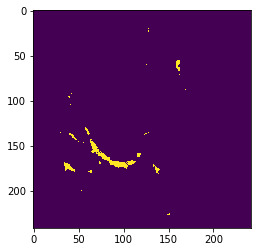

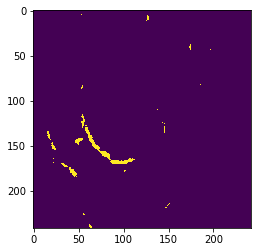

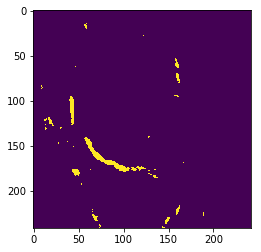

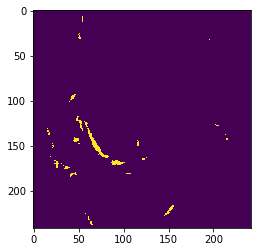

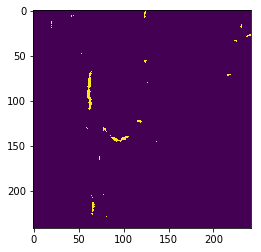

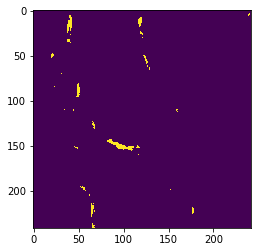

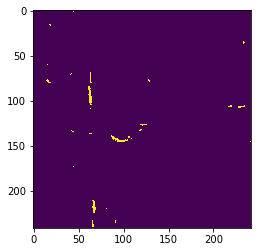

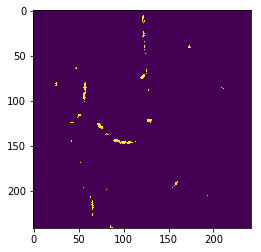

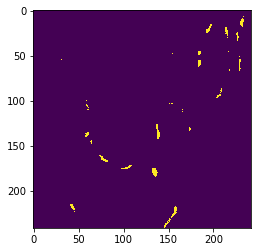

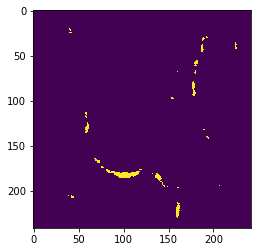

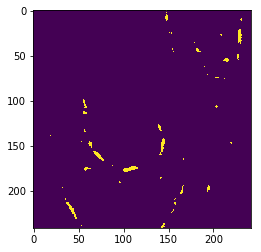

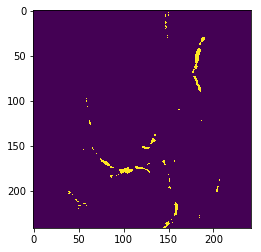

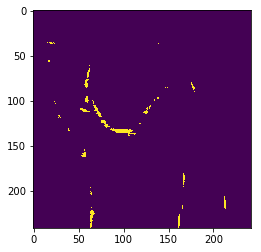

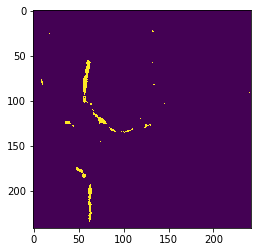

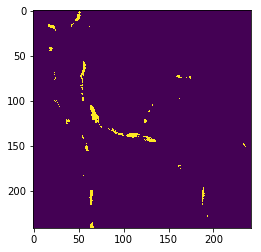

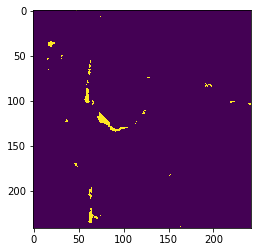

In [20]:
i=[4,6,5,3]
j=[7,5,8,6]
for a in i:
    for b in j:
        plt.imshow(reshaped_val_y[a,b,:,:])
        plt.show()
#         plt.imshow(reshaped_pp[a,b,:,:])
#         plt.show()
#         print("-----------------------------")